# Import Libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

# Loading Model

In [2]:
model = tf.keras.models.load_model("trained_model.keras")

c:\Users\DELL\Documents\my progamming folder\Projects\AI-Crop-Disease-Detection\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 26 variables whereas the saved optimizer has 50 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


# Visualizing single image of test set

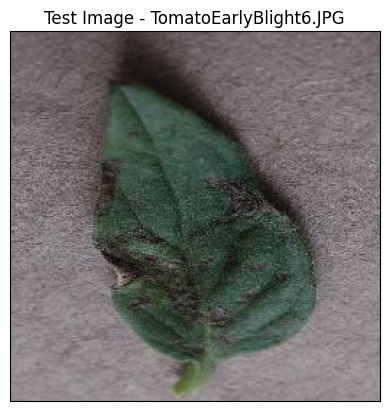

In [3]:
# load image
image_path = "dataset/test/test/TomatoEarlyBlight6.JPG"
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convert image to RGB format

# display image
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.title(f'Test Image - {image_path.split('/')[-1]}')
plt.show()

# Testing Model

In [4]:
# image to PIL format
image = tf.keras.utils.load_img(image_path, target_size=(128, 128))
# PIL Image to array
img_array = tf.keras.utils.img_to_array(image)
img_array = np.array([img_array]) # to covert single image to a batch
img_array.shape

(1, 128, 128, 3)

## prediction

In [5]:
prediction = model.predict(img_array)
prediction.shape, prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


((1, 38),
 array([[4.6510664e-07, 3.4269897e-07, 8.0459258e-06, 7.8264311e-06,
         4.3464144e-07, 3.8875379e-07, 4.2656552e-08, 6.2133995e-07,
         1.1692790e-08, 1.0406332e-06, 8.9363201e-09, 2.7848519e-06,
         4.8943302e-06, 1.0423882e-06, 2.0367969e-07, 3.4258346e-06,
         2.5483369e-06, 3.4962693e-06, 4.1074281e-06, 7.2783882e-07,
         9.1231350e-08, 4.3436653e-06, 8.5253050e-06, 5.7900343e-07,
         7.3674755e-06, 6.4898172e-06, 3.3303174e-06, 1.5716259e-07,
         1.2945468e-04, 8.7618576e-03, 3.2484637e-05, 2.5170011e-04,
         6.8361842e-06, 2.4180177e-01, 7.4540550e-01, 1.4060249e-03,
         1.9705165e-03, 1.6047915e-04]], dtype=float32))

In [6]:
result_index = np.argmax(prediction)
result_index

34

### matching to class name

In [7]:
class_names = [
    'Apple___Apple_scab',
    'Apple___Black_rot',
    'Apple___Cedar_apple_rust',
    'Apple___healthy',
    'Blueberry___healthy',
    'Cherry_(including_sour)___Powdery_mildew',
    'Cherry_(including_sour)___healthy',
    'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
    'Corn_(maize)___Common_rust_',
    'Corn_(maize)___Northern_Leaf_Blight',
    'Corn_(maize)___healthy',
    'Grape___Black_rot',
    'Grape___Esca_(Black_Measles)',
    'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
    'Grape___healthy',
    'Orange___Haunglongbing_(Citrus_greening)',
    'Peach___Bacterial_spot',
    'Peach___healthy',
    'Pepper,_bell___Bacterial_spot',
    'Pepper,_bell___healthy',
    'Potato___Early_blight',
    'Potato___Late_blight',
    'Potato___healthy',
    'Raspberry___healthy',
    'Soybean___healthy',
    'Squash___Powdery_mildew',
    'Strawberry___Leaf_scorch',
    'Strawberry___healthy',
    'Tomato___Bacterial_spot',
    'Tomato___Early_blight',
    'Tomato___Late_blight',
    'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Target_Spot',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___Tomato_mosaic_virus',
    'Tomato___healthy'
]

### Displaying Result of Disease Prediction

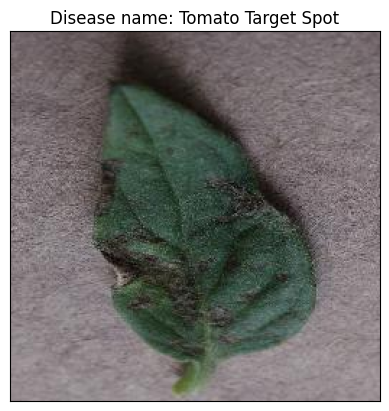

In [8]:
model_prediction = class_names[result_index]
disease_name_split = model_prediction.split('_')
disease_name_list = []
for i in disease_name_split:
    if i != "" and i not in disease_name_list:
        disease_name_list.append(i)
disease_name = " ".join(disease_name_list)
# display image
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.title(f'Disease name: {disease_name}')
plt.show()